In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import pandas as pd
import seaborn as sns

from sklearn.metrics import confusion_matrix
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Dropout 
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
from keras.datasets import cifar10

%matplotlib inline

In [ ]:
# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
# Train validation sets split
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

In [ ]:
# Normalization 
mean = np.mean(x_train, axis = (0, 1, 2, 3))
std = np.std(x_train, axis = (0, 1, 2, 3))
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std
x_valid = (x_valid - mean)/std

In [14]:
# CNN model

num_filters = 32
num_classes = len(np.unique(y_train))

model = Sequential()
model.add(Conv2D(num_filters, (3, 3), padding = 'same', 
                 input_shape = (32, 32, 3))) # conv_1
model.add(Activation('relu')) # relu_1
model.add(MaxPooling2D(pool_size = (2, 2))) # pooling_1

model.add(Flatten()) # FC
model.add(Dense(num_classes, activation = 'softmax'))

model.summary()

# Compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', 
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                81930     
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


In [15]:
# One hot encoding 
print(x_train.shape, x_test.shape,x_valid.shape)

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
y_valid= np_utils.to_categorical(y_valid, num_classes)

(40000, 32, 32, 3) (10000, 32, 32, 3) (10000, 32, 32, 3)


In [16]:
# Train the model

start = time.time()
fit = model.fit(x_train, y_train,
                batch_size = 500, 
                epochs = 20,
                validation_data = (x_valid,y_valid))
end = time.time()
print("Training time: %0.2f seconds!"%(end - start))

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 53s 1ms/step - loss: 1.6795 - acc: 0.4143 - val_loss: 1.4428 - val_acc: 0.5025
Epoch 2/20
40000/40000 [==============================] - 52s 1ms/step - loss: 1.3499 - acc: 0.5349 - val_loss: 1.2955 - val_acc: 0.5541
Epoch 3/20
40000/40000 [==============================] - 50s 1ms/step - loss: 1.2036 - acc: 0.5883 - val_loss: 1.2157 - val_acc: 0.5723
Epoch 4/20
40000/40000 [==============================] - 50s 1ms/step - loss: 1.1148 - acc: 0.6178 - val_loss: 1.1583 - val_acc: 0.6011
Epoch 5/20
40000/40000 [==============================] - 51s 1ms/step - loss: 1.0557 - acc: 0.6379 - val_loss: 1.1312 - val_acc: 0.6095
Epoch 6/20
40000/40000 [==============================] - 49s 1ms/step - loss: 1.0108 - acc: 0.6535 - val_loss: 1.0799 - val_acc: 0.6298
Epoch 7/20
40000/40000 [==============================] - 46s 1ms/step - loss: 0.9571 - acc: 0.6740 - val_loss: 1.0632 - val_acc

In [17]:
evalu_improve = model.evaluate(x_test, y_test, batch_size=500, verbose=1)
print('\nAccuracy of improvement model: %.2f , Loss: %.3f' % (100*evalu_improve[1], evalu_improve[0]))

10000/10000 [==============================] - 4s 430us/step

Accuracy of improvement model: 64.65 , Loss: 1.042


Text(0.5,1,'Confusion Matrix')

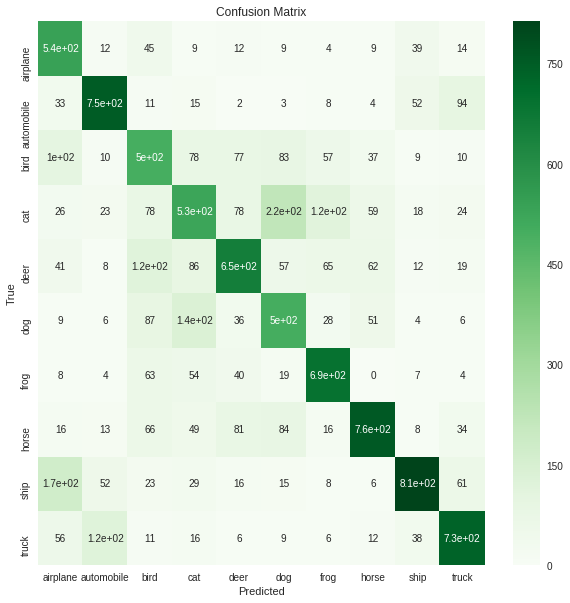

In [18]:
ytrue = np.where(y_test == 1)[1]
yprob = model.predict(x_test) 
ypredict = yprob.argmax(axis=-1)

confusion_mat = confusion_matrix(ypredict, ytrue)
df_confusion_mat = pd.DataFrame(confusion_mat,index=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"],columns=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"])

plt.figure(figsize = (10,10))
sns.heatmap(df_confusion_mat, xticklabels=True, yticklabels=True,cmap="Greens",annot=True)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
  

In [19]:
target_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
print(classification_report(ytrue, ypredict, target_names=target_names))
              

              precision    recall  f1-score   support

    airplane       0.78      0.54      0.64      1000
  automobile       0.77      0.75      0.76      1000
        bird       0.52      0.50      0.51      1000
         cat       0.45      0.53      0.49      1000
        deer       0.58      0.65      0.61      1000
         dog       0.58      0.50      0.54      1000
        frog       0.78      0.69      0.73      1000
       horse       0.67      0.76      0.71      1000
        ship       0.68      0.81      0.74      1000
       truck       0.73      0.73      0.73      1000

   micro avg       0.65      0.65      0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000



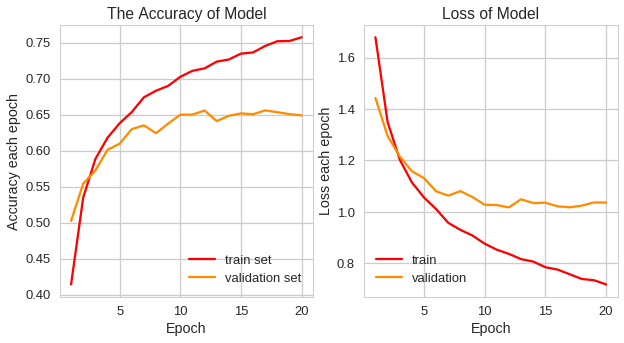

In [20]:
%matplotlib inline

# Plot the accuracy of Model
def model_accuracy_cost(track):
  
    sns.set_context("talk")
    sns.set_style("whitegrid")
    
    fig, axs = plt.subplots(1, 2,figsize=(10, 5))
    # The plot of accuracy
    axs[0].plot(range(1,21),track.history['acc'],color='red')
    axs[0].plot(range(1,21),track.history['val_acc'],color='darkorange')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Accuracy each epoch')
    axs[0].set_title('The Accuracy of Model')
    axs[0].legend(['train set', 'validation set'], loc=4)
    
    # The plot of loss 
    axs[1].plot(range(1,21),track.history['loss'],color='red')
    axs[1].plot(range(1,21),track.history['val_loss'],color='darkorange')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Loss each epoch')
    axs[1].set_xlabel('Epoch')
    axs[1].set_title('Loss of Model')
    axs[1].legend(['train', 'validation'], loc=3)
    
    plt.show()
    
# Plot show
model_accuracy_cost(fit)